In [24]:
import pandas as pd
import numpy as np
import math 
import numpy as np
import matplotlib
from matplotlib.pylab import *
import matplotlib.pyplot as plt

In [25]:
covar = pd.read_csv(r'covar-3a-cgc-pdb.dat', sep=' ', header=None)

resnum = int(math.sqrt((len(covar.index))/3))

all_results = pd.DataFrame()

for i in range(0,resnum):

    three_step = pd.DataFrame()
    for j in range((i*resnum)*3,int(len(covar)/resnum)*(i+1),resnum):
        df = covar[j:resnum+j]
        df2 = df.reset_index(drop=True)
        three_step = pd.concat([three_step,df2], ignore_index=True, axis=1)
    
    all_results = pd.concat([all_results,three_step], ignore_index=True, axis=0)

In [26]:
all_results['sum'] = all_results.sum(axis=1)
a=all_results['sum'].to_numpy()
cov_matrix = a.reshape(resnum,resnum)

In [27]:
#convert the covariance matrix to cross-correlation
corr=np.zeros((resnum,resnum))
for i in range(0,resnum):
    for j in range(0,resnum):
        corr[i,j] = cov_matrix[i,j]/math.sqrt(cov_matrix[i,i]*cov_matrix[j,j])

np.savetxt("cross_corr_3a-cgc-pdb.csv", corr, delimiter=" ", fmt='%s')


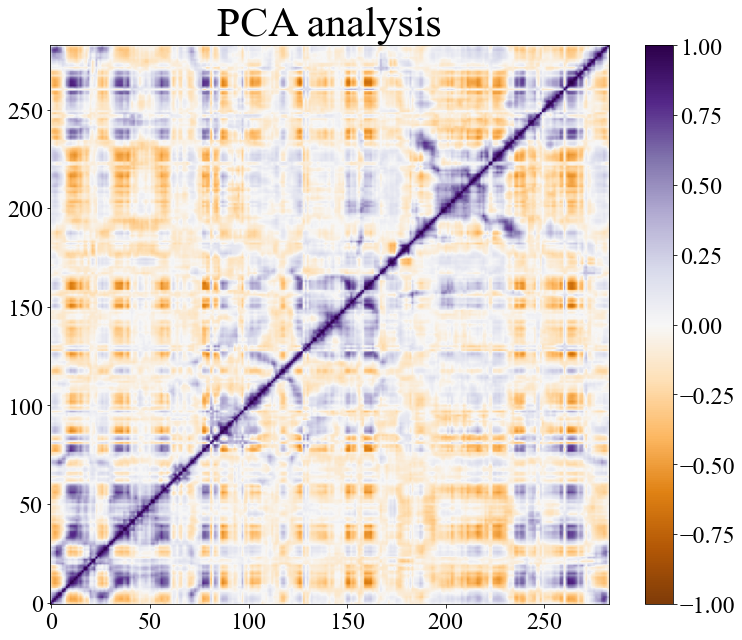

In [29]:
file=np.loadtxt('cross_corr_3a-cgc-pdb.csv')
data= np.array(file)
fig, ax = plt.subplots(figsize=(11,9))
im = ax.imshow(data, cmap=plt.cm.PuOr, vmin=-1, vmax=1, origin='lower')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=24)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
ax.set_title("PCA analysis", fontname= "Times New Roman", fontsize=42, pad=10)
ax.tick_params(labelsize=24)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
fig.tight_layout()
fig.savefig('cross_corr_3a-cgc-pdb.jpeg', dpi=500)